In [1]:
import altair as alt
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from altair.utils.data import to_values

In [2]:
data_folder = "/home/mingi/data/vistext/data/vl_spec"
scengraph_file_list = os.listdir(data_folder)
tsv_path = "/home/mingi/data/vistext/statista_dataset/tsv_dataset"
save_path = "/home/mingi/data/test_charts/img"

In [3]:
def save_chart_from_tsv_file_path(
    data_dir=None, file_name=None, tsv_path=None, save_path=None, rot90=False
):
    file_path = os.path.join(data_dir, file_name)
    data_path = os.path.join(data_folder, file_name)
    scenegraph = json.load(open(data_path, "r"))
    scenegraph = None

    tsv = os.path.join(tsv_path, scenegraph["data"]["url"])
    df = pd.read_csv(tsv, sep="\t")
    scenegraph["data"] = to_values(df)

    if scenegraph["encoding"]["x"]["type"] == "temporal":
        scenegraph["encoding"]["x"]["type"] = "nominal"

    if rot90:
        x = scenegraph["encoding"]["x"]
        y = scenegraph["encoding"]["y"]

        scenegraph["encoding"].pop("x")
        scenegraph["encoding"].pop("y")
        scenegraph["encoding"]["x"] = y
        scenegraph["encoding"]["y"] = x

    chart = alt.Chart.from_dict(scenegraph)

    if rot90:
        save_file_name = file_name.split(".")[0] + "_rot90.png"
    else:
        save_file_name = file_name.split(".")[0] + ".png"

    save_file_path = os.path.join(save_path, save_file_name)
    chart.save(save_file_path)

In [4]:
# for i, file_name in enumerate(scengraph_file_list):
#     save_chart_from_tsv_file_path(
#         data_dir=data_folder,
#         file_name=file_name,
#         tsv_path=tsv_path,
#         save_path=save_path,
#         rot90=False,
#     )
#     save_chart_from_tsv_file_path(
#         data_dir=data_folder,
#         file_name=file_name,
#         tsv_path=tsv_path,
#         save_path=save_path,
#         rot90=True,
#     )
#     if i == 100:
#         break

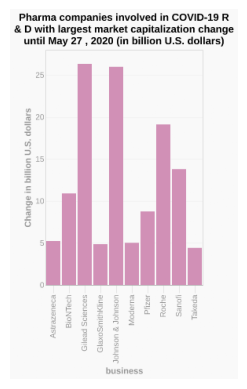

In [5]:
img = mpimg.imread("/home/mingi/data/vistext/data/test_images/vertical/5358.png")

plt.imshow(img)
plt.axis("off")  # 축 제거
plt.show()